In [5]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Obtener el HTML
html = requests.get(url).text

# Parsear con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Buscar la tabla que contiene "Tesla Quarterly Revenue"
# (Updated to find the correct table)
tables = soup.find_all("table")

# Check if any tables were found before trying to access them
if tables:
    # Search for the table with the revenue data, may be in a different position
    for table in tables:
        if "Tesla Quarterly Revenue" in table.text:
            tesla_revenue = pd.read_html(str(table))[0]
            break  # Exit the loop once found
    else:
        # If the loop completes without finding the table, print a message and exit
        print("Table with 'Tesla Quarterly Revenue' not found on the page.")
        exit()  # or you can handle this differently, e.g., by assigning an empty DataFrame to tesla_revenue

    # Limpiar datos
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

    # Mostrar los primeros datos
    tesla_revenue.head()

else:
    # If no tables are found at all, print a message and exit
    print("No tables found on the page.")
    exit()  # or you can handle this differently, e.g., by assigning an empty DataFrame to tesla_revenue


No tables found on the page.


In [1]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674833,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [2]:
# URL de ingresos de GameStop
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Import the requests library
import requests
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup
import pandas as pd

# Obtener HTML
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")

# Buscar tabla correcta
# The original selector was too specific and may have been broken by website changes.
# This new selector targets all tables on the page.
tables = soup_gme.find_all("table", class_="historical_data_table table")

gme_revenue = None  # Initialize gme_revenue to None to handle the case where the table is not found

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        break

# Check if gme_revenue was assigned a value
if gme_revenue is not None:
    # Limpiar datos
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

    # Mostrar datos
    print(gme_revenue.head())
else:
    print("Table with 'GameStop Quarterly Revenue' not found on the page.")

Table with 'GameStop Quarterly Revenue' not found on the page.


No tables found on the page.


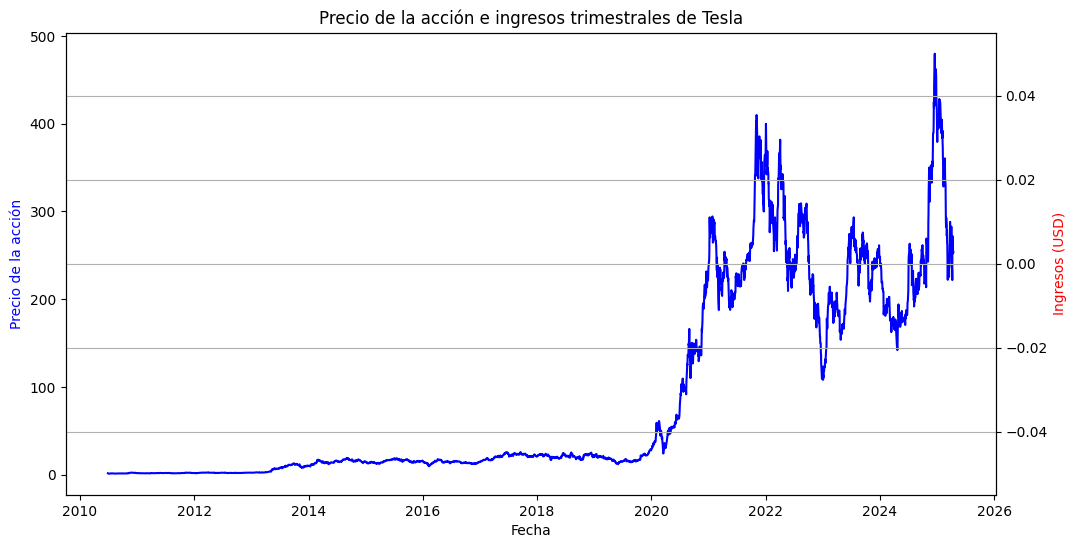

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Get Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
tables = soup.find_all("table")

# Initialize tesla_revenue to an empty DataFrame to avoid NameError if the table is not found
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if tables:
    for table in tables:
        if "Tesla Quarterly Revenue" in table.text:
            tesla_revenue = pd.read_html(str(table))[0]
            break
    else:
        print("Table with 'Tesla Quarterly Revenue' not found on the page.")
        # Instead of exiting, you might want to continue with an empty DataFrame or handle the error differently.
        # exit()

    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)
else:
    print("No tables found on the page.")
    # Instead of exiting, you might want to continue with an empty DataFrame or handle the error differently.
    # exit()

# Ensure dates are in datetime format
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(tesla_data["Date"], tesla_data["Close"], color="blue", label="Precio de la acción (TSLA)")
ax1.set_ylabel("Precio de la acción", color="blue")
ax1.set_xlabel("Fecha")

ax2 = ax1.twinx()
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="red", label="Ingresos (TSLA)")
ax2.set_ylabel("Ingresos (USD)", color="red")

plt.title("Precio de la acción e ingresos trimestrales de Tesla")
plt.grid(True)
plt.show()

In [4]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)